In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact

In [57]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\Data Analysis Projects\Open Jobs Analysis and Recommendations\cleaned_naukri.csv")

In [58]:
data.head(2)

,company,education,industry,jobdescription,joblocation_address,jobtitle,numberofpositions,payrate,postdate,skills,min_experience,max_experience
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media,Job Description Send me Jobs like this Quali...,Chennai,Walkin Data Entry Operator (night Shift),1,"1,50,000 - 2,25,000 P.A",2016-05-21,ITES,0.0,1.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising,Job Description Send me Jobs like this Quali...,Chennai,Work Based Onhome Based Part Time.,60,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21,Marketing,0.0,0.0


## Find the Companies which has Highest Openings for Job

In [59]:
@interact
def jobsbycompanies(top_n=range(5,26,5),jobs=list(data['industry'].unique())):
    plot_df=data.groupby(['industry','company'],as_index=False)['numberofpositions'].sum().sort_values(by='numberofpositions',ascending=False)
    plot_df=plot_df.loc[plot_df['industry']==jobs].head(top_n)
    def slice(st):
        if isinstance(st,str):
            return st[:30]
        return st
    plot_df['company']=plot_df['company'].apply(slice)
    sns.barplot(x=plot_df['company'],y=plot_df['numberofpositions'])
    plt.title(f'Companies with the Most Jobs Open in {jobs}')
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

interactive(children=(Dropdown(description='top_n', options=(5, 10, 15, 20, 25), value=5), Dropdown(descriptio…

## Find the Company with Highest number of Sales Job

In [194]:
top_comp_4_sales_positions=data.loc[data['skills']=='Sales']
top_comp_4_sales_positions=top_comp_4_sales_positions.groupby('company')['numberofpositions'].sum().sort_values(ascending=False).head(5)
print(f'{top_comp_4_sales_positions.index[0]} is the top sales employer with {top_comp_4_sales_positions.values[0]} positions')
display(top_comp_4_sales_positions)

Aspirtek Technologies Pvt. Ltd. is the top sales employer with 1448 positions


company
Aspirtek Technologies Pvt. Ltd.                                                                                      1448
Find Live Info Pvt Ltd                                                                                               1200
United Capital Club                                                                                                  1039
Sanskriti Consultancy hiring for Sales Manager/ Sr Sales Manager/ Agency Sales Manager- Life Insurance- Pan India     501
Sanskriti Consultancy hiring for Direct Sales Manager- Future Generali Life Insurance- Sales Job- Pan India           350
Name: numberofpositions, dtype: int64

## Compare the No. of Openings using Time Series

In [161]:
data['postdate']=pd.to_datetime(data['postdate'],yearfirst=True,format='%Y-%m-%d')
print(f'min date: {data['postdate'].min()}\nmax date: {data['postdate'].max()}')
data['ISO_week']=data['postdate'].dt.isocalendar().week
data['proper_date']=pd.to_datetime(data['postdate'],format='%Y-%m-%d').dt.strftime('%d, %B %y')
data['1st_of_month']=data['postdate'].dt.to_period('M').dt.to_timestamp()
data['year']=pd.to_datetime(data['postdate'],format='%Y-%m-%d').dt.year
data['month']=pd.to_datetime(data['postdate'],format='%Y-%m-%d').dt.strftime('%B')

min date: 2015-08-08 00:00:00
max date: 2017-01-11 00:00:00


In [162]:
weekly=['year','ISO_week']
openings_weekly=data.groupby(weekly,as_index=False)['numberofpositions'].sum().sort_values(by=weekly,ascending=[True,True]).reset_index(drop=True)
openings_weekly['year_week']=openings_weekly['year'].astype(str)+'_week_'+openings_weekly['ISO_week'].astype(str)
monthly=['1st_of_month']
openings_monthly=data.groupby(monthly)['numberofpositions'].sum()

In [163]:
type(openings_weekly['year_week'][0])

str

In [195]:
# create a dataframe with np.nan where no openings are listed
twofifteen=[f'2015_week_{i}' for i in range(32,54)]
two16=[f'2016_week_{i}' for i in range(1,54)]
two17=['2017_week_53','2017_week_1']
dates=twofifteen+two16+two17
lookup=dict(zip(openings_weekly['year_week'],openings_weekly['numberofpositions']))
openings=[lookup.get(dates[i],np.nan) for i in range(len(dates))]
dates=dates[:-2]+['2016_week_53','2017_week_1']
weekly_df=pd.DataFrame({'dates':dates,'openings':openings})
weekly_df.set_index('dates',inplace=True)

### weekly openings

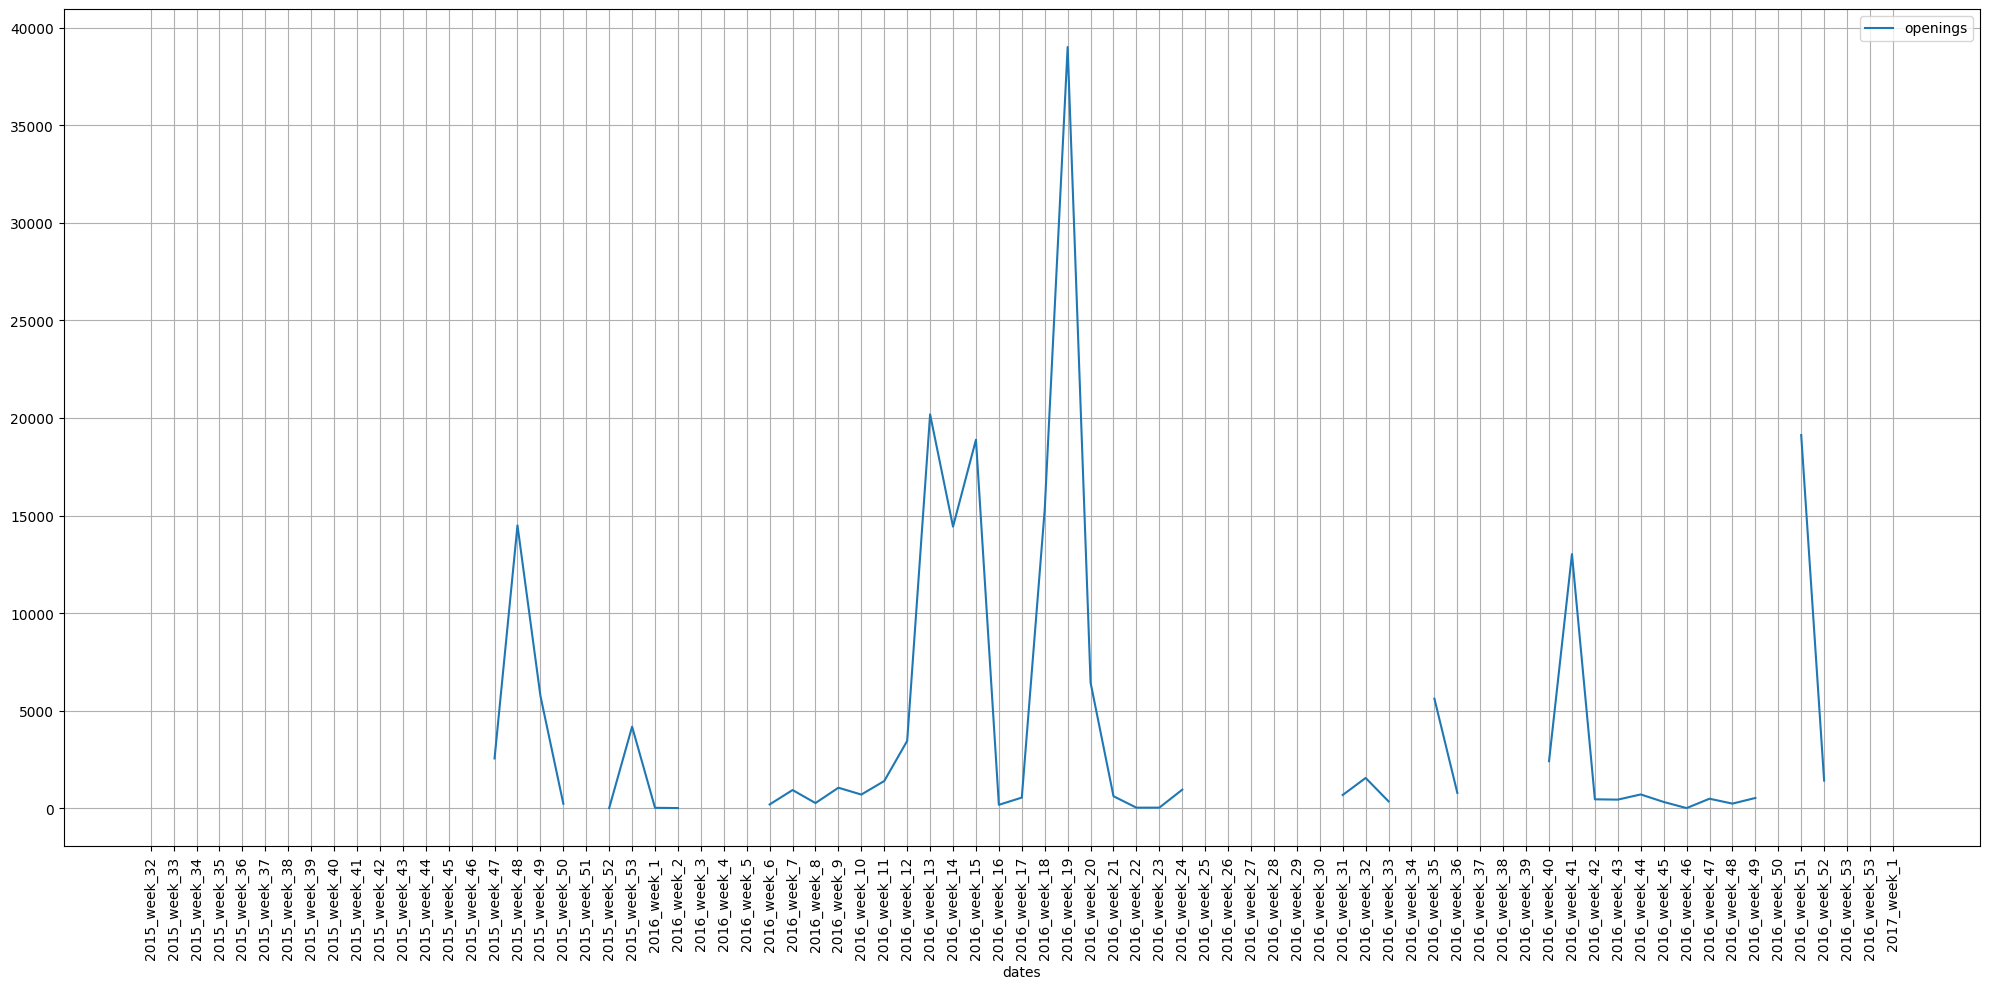

In [197]:
weekly_df.plot(figsize=(20,10))
plt.xticks(ticks=range(len(dates)), labels=dates, rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

### Monthly and weekly

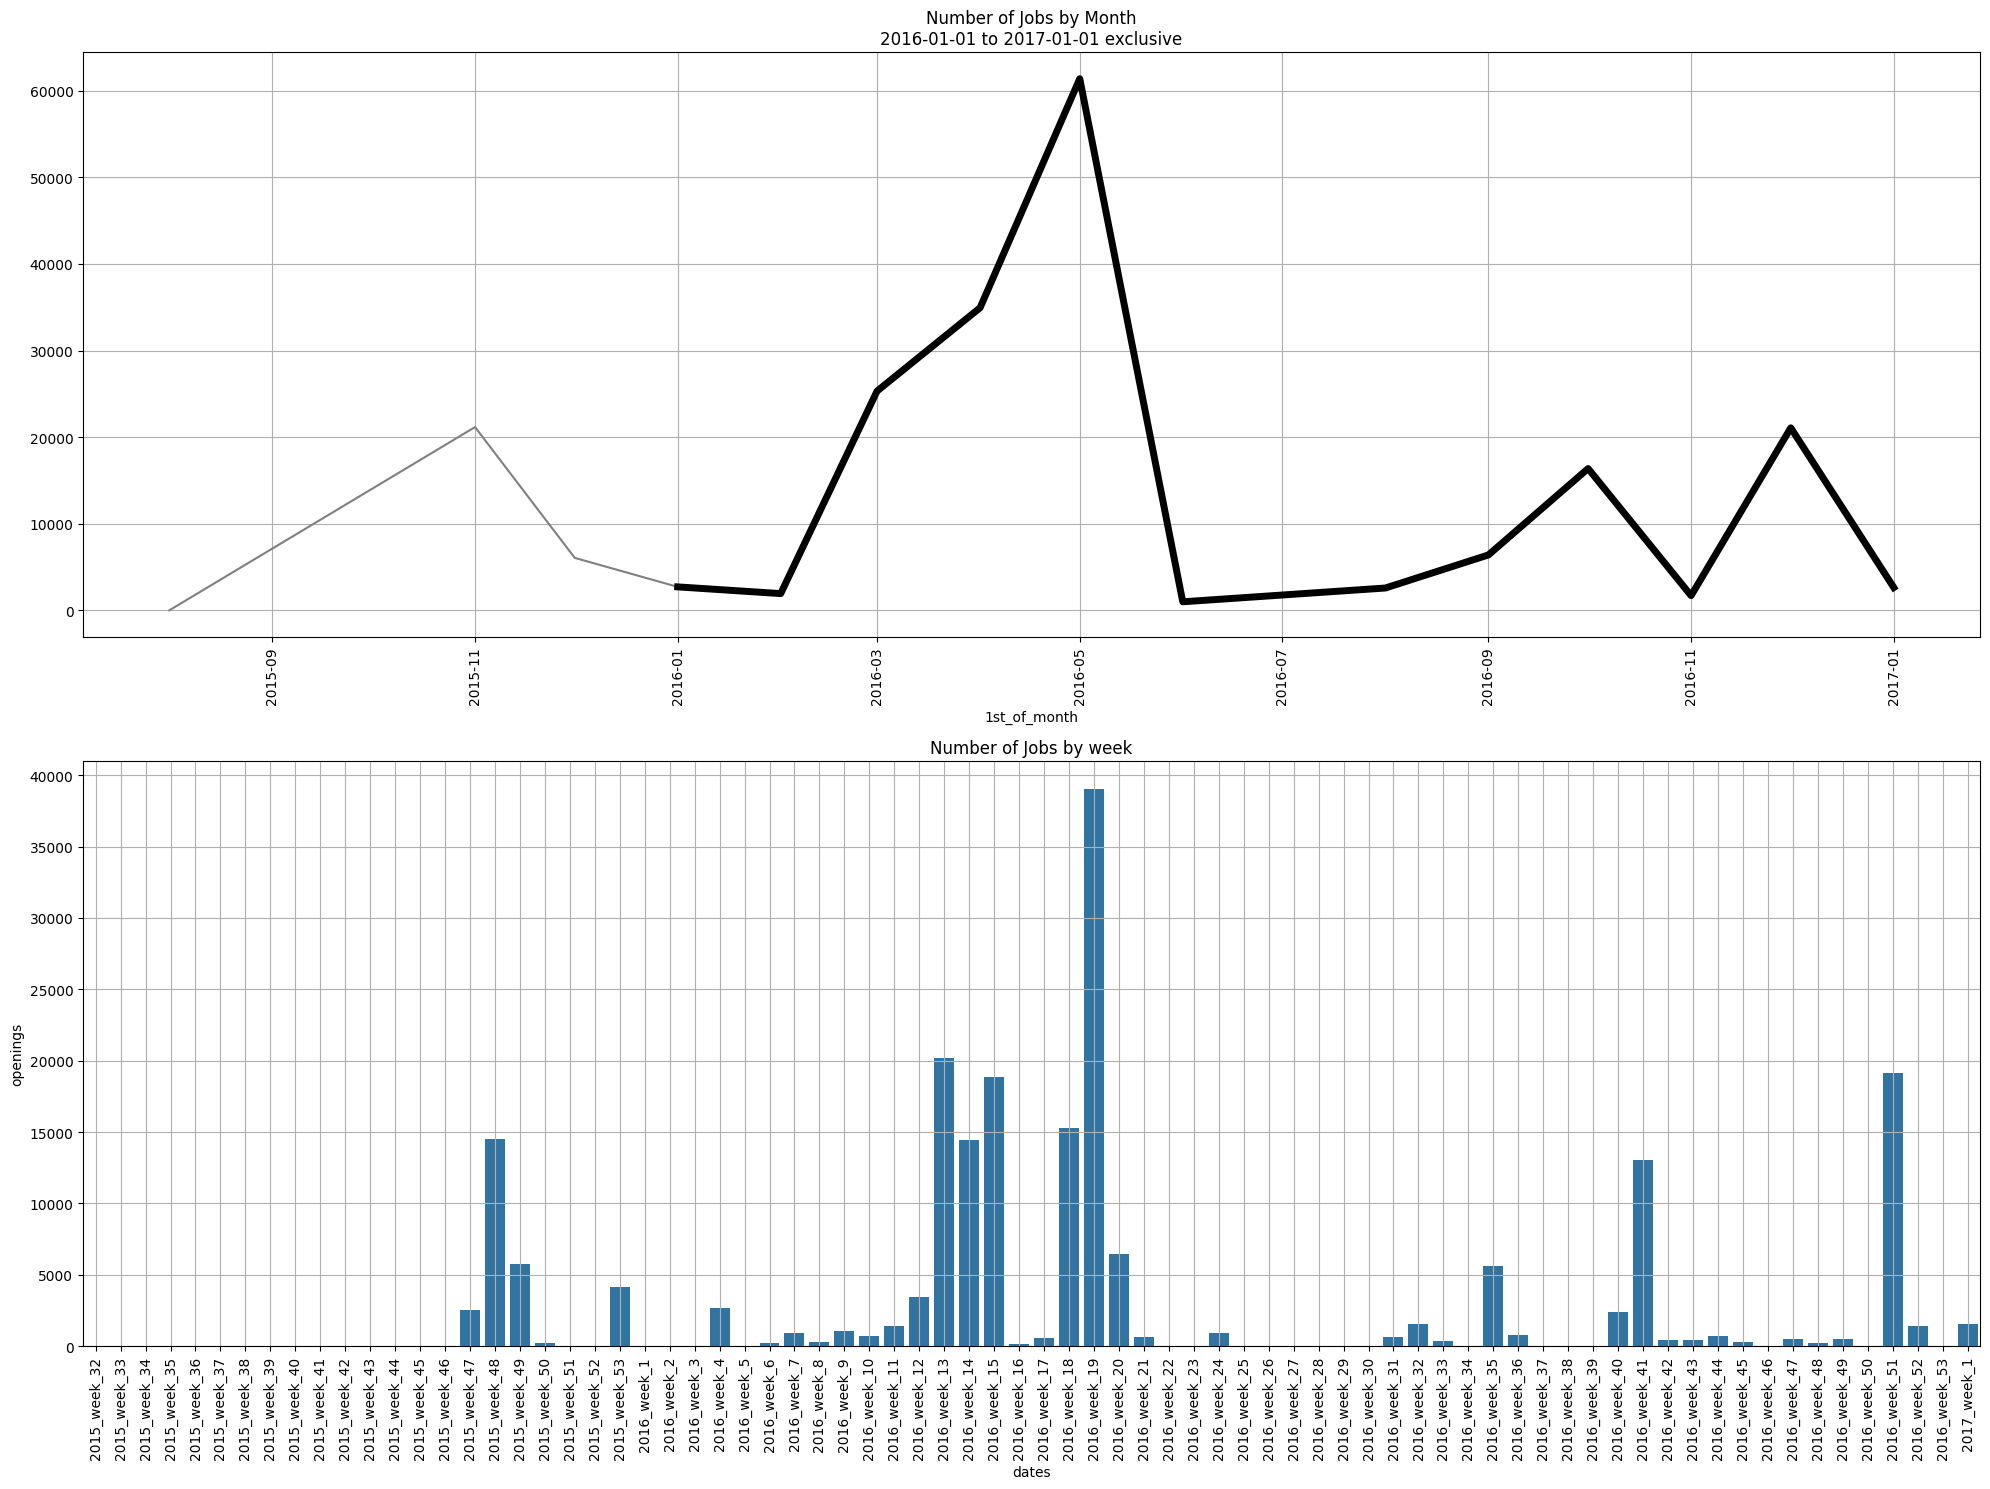

In [166]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
begin,end='2016-01-01','2017-01-01'
plt.title(f'Number of Jobs by Month\n{begin} to {end} exclusive')
sns.lineplot(x=openings_monthly.index,y=openings_monthly.values,color='grey')
sns.lineplot(x=openings_monthly[begin:end].index,y=openings_monthly[begin:end].values,color='black',linewidth=5)
plt.xticks(rotation=90)
plt.grid()
plt.subplot(2,1,2)
plt.title('Number of Jobs by week')
sns.barplot(x=weekly_df.index, y=weekly_df['openings'])
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

## Compare Job Openings for 2016 Monthly wise

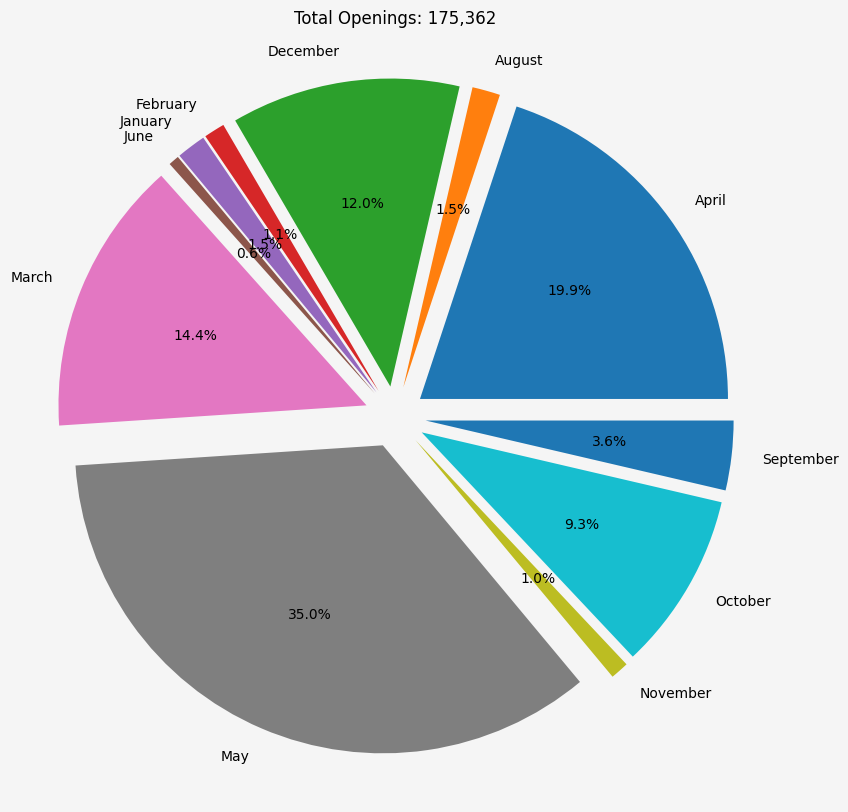

In [186]:
plot_data = data.loc[data['year'] == 2016]
plot_data = plot_data.groupby('month')['numberofpositions'].sum()
plt.figure(figsize=(10,10))
plt.pie(
	plot_data.values,
	labels=plot_data.index,
	autopct='%2.1f%%',
	shadow=False,
	explode=[0.1 for _ in range(plot_data.shape[0])]
)
plt.gcf().set_facecolor('whitesmoke')
plt.gca().set_facecolor('whitesmoke')
plt.title(f'Total Openings: {format(int(round(plot_data.sum(), 0)),',')}')
plt.show()